### 实验目标
- 掌握中文文本和英文文本词频统计过程；
- 了解中文分词jieba库的使用；
- 了解如何去除文档中的停用词；
- 了解wordcloud词云展示库，以及如何设置词云的字体、颜色和形状等参数。

### 实验要求
按照提示，编写完成实例1，实例2，实例3的代码。

### 问题1：一篇英文文章，出现了哪些词？哪些词出现得最多？ 

#### 分析：
 - 一篇英文文章由单词和标点符号构成，可以看成一个字符串，其中每个单词之间用空格或者标点符号隔开。
 - 步骤：
   1. 打开要处理的文章并读取其中的内容；
   2. 为了不区分大小写，将字符串进行大小写转换；同时利用字符串的replace()方法将标点符号用空字符替换；
   3. 利用字符串的split()方法将字符串按照空格划分为单词的列表；
   4. 创建字典，每个单词为字典的键，每个键所对应的值为单词在文章中出现的次数；
   5. 将字典按照值从大到小排序；
   6. 输出出现次数最多的前20个单词以及它们在文章中出现的次数。

#### 实例1： 统计英文文章(以 hamlet.txt 为例)中每个单词及其出现的次数，打印出现次数最多的前20个单词

In [34]:
def getText(filename):
    '''参数filename为文章路径，函数将英文文章中的单词统一进行小写(或者大写)转换
    同时将文章中的标点符号替换为空字符。函数返回处理后的文本'''
    txt = ''
    with open(filename, 'r') as f:
            for line in f:
                line = line.lower()
                line = line.replace(',','')
                line = line.replace('\'','')
                line = line.replace('.','')
                line = line.replace('?','')
                line = line.replace('!','')
                line = line.replace(':','')
                line = line.replace(';','')
                line = line.replace('|','')
                line = line.replace('-','')
                line = line.replace('[','')
                line = line.replace(']','')
                line = line.replace('\n','')
                txt = txt + line 
    return txt
            
    pass

In [45]:
filename = "./hamlet.txt"
# 调用函数得到处理后的文本
hamletTxt = getText(filename)
# 对文本进行划分，得到单词的列表
word = hamletTxt.split()
# 创建字典，键为单词，值为每个单词出现的次数
dict = {}
for w in word:
    if w not in dict:
        dict[w] = 1
    else:
        dict[w] = dict[w] + 1

# 将字典按照值从大到小排序
dict_sort = sorted(dict.items(),key=lambda x:x[1],reverse=True)
# 打印出排名前10的单词和频次
print(dict_sort[:10])


[('the', 945), ('and', 682), ('of', 602), ('to', 596), ('a', 441), ('my', 436), ('you', 429), ('i', 382), ('in', 378), ('it', 299)]


### 问题2：如果是统计一篇中文文章中单词出现的次数呢？

#### 分析：
 - 中文文本单词之间没有空格，语法关系通过单词之间的顺序来表达；
 - 中文文本需要通过分词获得单个的词语；
 
#### jieba库 
 - 优秀的中文分词第三方库，需要额外安装(cmd命令行，pip install jieba)；
 - 提供三种分词模式，只需掌握其中一个函数；
 
 
 函数 | 描述
---|---
jieba.lcut(s) | 精确模式，返回一个列表类型的分词结果
jieba.lcut(s,cut_all=True) | 全模式，返回一个列表类型的分词结果，存在冗余
jieba.lcut_for_search(s) | 搜索引擎模式，返回一个列表类型的分词结果，存在冗余
jieba.add_word(w)  | 向分词词典增加新词w

In [47]:
import jieba

In [56]:
string1 = "中国是一个伟大的国家"
string2 = "中华人民共和国是伟大的"
print(jieba.lcut(string1))

['中国', '是', '一个', '伟大', '的', '国家']


In [49]:
print(jieba.lcut(string1,cut_all=True))

['中国', '国是', '一个', '伟大', '的', '国家']


In [75]:
print(jieba.lcut_for_search(string2))

['中华', '华人', '人民', '共和', '共和国', '中华人民共和国', '是', '伟大', '的']


#### 实例2：十九大报告中哪个单词出现的频次最高

步骤：
   1. 打开要处理的文章并读取其中的内容；
   2. 利用 jieba库中的lcut()方法进行单词划分；
   4. 创建字典，每个单词为字典的键，每个键所对应的值为单词在文章中出现的次数；长度为1的单词不进行统计；
   5. 去除停用词（文本中不包括有效文本性质的代词，介词，助词等功能词）；
   6. 将字典按照值从大到小排序；
   7. 输出出现次数最多的前20个单词以及它们在文章中出现的次数。
   

说明：可以将停用词存储在一个文件（stop.txt）中，此文件可自行修改。

In [99]:
import jieba



# 创建单词字典
dict_19 = {}
# 读取内容
with open('十九大报告.txt','r') as f:

# 用jieba库中的lcut()函数对speech_text进行词语分割，从而得到中文单词构成的列表；
    for line in f:
        line = jieba.lcut(line)
        for w in line:
            if len(w)>1:
                if w not in dict_19:
                    dict_19[w] = 1
                else:
                    dict_19[w] = dict_19[w] + 1



#去掉停用词
stop = []
with open('stop.txt','r') as fb:
    for line in fb:
        line = line.replace('\n','')
        for key in dict_19.keys():
            if line == key:
                stop.append(line)
for w in stop:
    del dict_19[w]

# 标点符号也写入stop.txt


# 对字典按照值排序
dict_sort = sorted(dict_19.items(),key=lambda x:x[1],reverse=True)

    
# 打印出现次数最多的前20个单词
print(dict_sort[:20])

<class 'list'>
[('发展', 212), ('中国', 168), ('人民', 157), ('建设', 148), ('社会主义', 146), ('国家', 90), ('制度', 83), ('推进', 81), ('社会', 80), ('政治', 80), ('特色', 79), ('体系', 68), ('文化', 66), ('时代', 63), ('经济', 59), ('完善', 51), ('我国', 50), ('现代化', 47), ('推动', 47), ('创新', 44)]


### wordcloud库
- 优秀的词云展示第三方库，需要额外安装(cmd命令行：pip install wordcloud)
- 词云以词语为基本单位，更加直观和艺术地展示文本
- 把词云当做一个WordCloud对象，可以根据文本中词语出现的频率等参数绘制词云
- 词云的绘制形状，尺寸和颜色都可以设定

#### wordcloud库常规方法

w = wordcloud.WordCloud()

方法 | 描述
:---|---|
w.generate(txt)       | 向WordCloud对象w中加载文本txt
w.to_file(filename)   | 将词云输出为图像文件，.png或.jpg格式

#### 示例1： 测试wordcloud库

In [53]:
from wordcloud import WordCloud

c = WordCloud()
c.generate("WordCloud Python")
c.to_file("./wordcloud1.png")

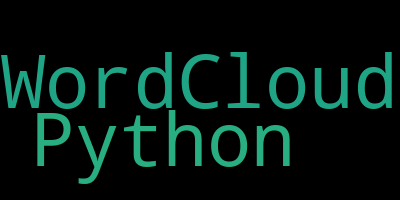

#### w = wordcloud.WordCloud(<参数>)

配置对象参数

参数 | 描述
:---|---|
width       | 指定词云对象生成图片的宽度，默认400像素；示例：w = wordcloud.WordCloud(width=600)
height      | 指定词云对象生成图片的高度，默认200像素；示例：w = wordcloud.WordCloud(height=400)
min_font_size | 指定词云中字体的最小字号，默认4号
max_font_size | 指定词云中字体的最大字号，根据高度自动调节
font_step    | 指定词云中字体字号的步进间隔，默认为1
font_path	 | 指定字体文件的路径，默认None；
max_words	 | 指定词云显示的最大单词数量，默认200
stop_words	 | 指定词云的排除词列表，即不显示的单词列表
mask	     | 指定词云形状，默认为长方形，需要引用imread()函数
background_color	| 指定词云图片的背景颜色，默认为黑色

备注：使用wordColud设计词云的时候可能会产生乱码问题，因为wordColud默认的字体(\Anaconda3\Lib\site-packages\wordcloud下保存)不支持中文，所以我们需要替换wordColud的默认字体。

#### 示例2：词云展示

In [55]:
import jieba
from wordcloud import WordCloud
from imageio import imread

mask = imread("./fivestar.jpg")
font = './FZSTK.TTF'

txt = "程序设计语言是计算机能够理解和识别用户操作意图的一种交互体系，\
它按照特定规则组织计算机指令，使计算机能够自动进行各种运算处理。"

w = WordCloud(
    width=500,
    font_path= font,
    height=500,
    background_color = "white",
    mask = mask)

w.generate(" ".join(jieba.lcut(txt))) # 中文需要先分词并组成空格连接的字符串
w.to_file("./pywcloud.png")

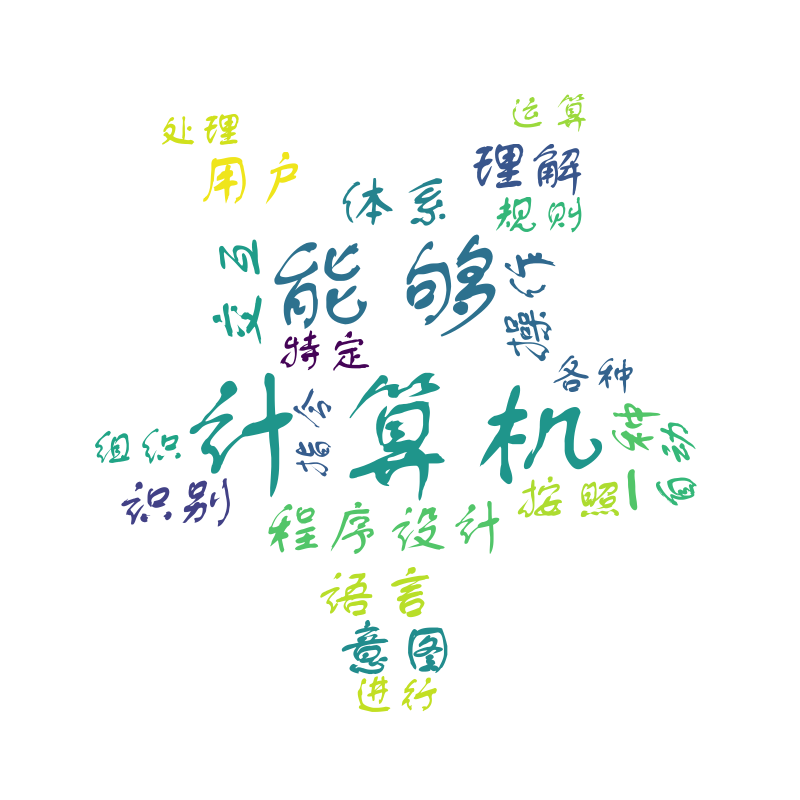

#### 实例3：政府工作报告词云

- 生成十九大报告的词云；
- 尝试使用不同的词云形状以及字体

In [113]:
import jieba
import wordcloud
from imageio import imread
mask = imread("./fivestar.jpg")
font = './FZSTK.TTF'

str_19 = ''

for x in dict_19.keys():
    str_19 = str_19 + '' + x
    

w = WordCloud(
            width=500,
            font_path= font,
            height=500,
            background_color = "white",
            mask = mask
)
w.generate(" ".join(jieba.lcut(str_19))) # 中文需要先分词并组成空格连接的字符串
w.to_file("./19.png")
w = WordCloud(
            width=500,
            font_path= font,
            height=500,
            background_color = "white",
            
)
w.generate(" ".join(jieba.lcut(str_19))) # 中文需要先分词并组成空格连接的字符串
w.to_file("./20.png")

/bin/sh: 1: [19.png]: not found
